In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore

In [2]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

In [62]:
df_tsla = yf.download('TSLA', start='2015-07-01', end='2025-07-31')
df_bnd = yf.download('BND', start='2015-07-01', end='2025-07-31')
df_spy = yf.download('SPY', start='2015-07-01', end='2025-07-31')

C:\Users\cbe\AppData\Local\Temp\ipykernel_11520\929611154.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tsla = yf.download('TSLA', start='2015-07-01', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\cbe\AppData\Local\Temp\ipykernel_11520\929611154.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_bnd = yf.download('BND', start='2015-07-01', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\cbe\AppData\Local\Temp\ipykernel_11520\929611154.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_spy = yf.download('SPY', start='2015-07-01', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed


In [63]:
# Flatten the MultiIndex columns
df_tsla.columns = df_tsla.columns.get_level_values(0)

# Reset index if you want Date to be a column instead of index
df_tsla = df_tsla.reset_index()

# Check the result
print(df_tsla.head())

Price       Date      Close       High        Low       Open     Volume
0     2015-07-01  17.943333  18.174667  17.856667  18.073999   31518000
1     2015-07-02  18.667999  18.830000  18.220667  18.680000  107458500
2     2015-07-06  18.648001  18.779333  18.420000  18.591999   61828500
3     2015-07-07  17.858667  18.346666  17.384666  18.333332   91576500
4     2015-07-08  16.997334  17.386667  16.954000  17.288000   93316500


In [64]:
# Flatten the MultiIndex columns
df_bnd.columns = df_bnd.columns.get_level_values(0)

# Reset index if you want Date to be a column instead of index
df_bnd = df_bnd.reset_index()

# Check the result
print(df_bnd.head())

Price       Date      Close       High        Low       Open   Volume
0     2015-07-01  60.816734  60.914460  60.764112  60.794183  5399300
1     2015-07-02  60.967060  61.027202  60.936989  60.936989  1060100
2     2015-07-06  61.177582  61.222691  61.057304  61.222691  2210700
3     2015-07-07  61.237698  61.470739  61.237698  61.410603  4183200
4     2015-07-08  61.410660  61.463282  61.312928  61.373070  1967800


In [65]:
# Flatten the MultiIndex columns
df_spy.columns = df_spy.columns.get_level_values(0)

# Reset index if you want Date to be a column instead of index
df_spy = df_spy.reset_index()

# Check the result
print(df_spy.head())

Price       Date       Close        High         Low        Open     Volume
0     2015-07-01  174.917114  175.363889  174.124717  175.110995  135979900
1     2015-07-02  174.756927  175.566188  174.335441  175.397596  104373700
2     2015-07-06  174.259644  175.043603  173.256502  173.458821  117975400
3     2015-07-07  175.355469  175.481910  172.059437  174.461918  173820200
4     2015-07-08  172.413467  174.293296  172.177436  174.006688  164020100


In [66]:
#df_bnd.to_csv('../Data/bnd.csv', index=False)
#df_spy.to_csv('../Data/spy.csv', index=False)
#df_tsla.to_csv('../Data/tsla.csv', index=False)

In [67]:
# Optionally, rename columns to avoid collisions
df_tsla = df_tsla.add_suffix('_TSLA')
df_tsla = df_tsla.rename(columns={'Date_TSLA': 'Date'})

df_bnd = df_bnd.add_suffix('_BND')
df_bnd = df_bnd.rename(columns={'Date_BND': 'Date'})

df_spy = df_spy.add_suffix('_SPY')
df_spy = df_spy.rename(columns={'Date_SPY': 'Date'})

# Merge all on 'Date'
merged_df = df_tsla.merge(df_bnd, on='Date', how='inner')
merged_df = merged_df.merge(df_spy, on='Date', how='inner')

In [68]:
merged_df.columns

Index(['Date', 'Close_TSLA', 'High_TSLA', 'Low_TSLA', 'Open_TSLA',
       'Volume_TSLA', 'Close_BND', 'High_BND', 'Low_BND', 'Open_BND',
       'Volume_BND', 'Close_SPY', 'High_SPY', 'Low_SPY', 'Open_SPY',
       'Volume_SPY'],
      dtype='object', name='Price')

In [69]:
merged_df.head()

Price,Date,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,Close_BND,High_BND,Low_BND,Open_BND,Volume_BND,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY
0,2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000,60.816734,60.914460,60.764112,60.794183,5399300,174.917114,175.363889,174.124717,175.110995,135979900
1,2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,60.967060,61.027202,60.936989,60.936989,1060100,174.756927,175.566188,174.335441,175.397596,104373700
2,2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,61.177582,61.222691,61.057304,61.222691,2210700,174.259644,175.043603,173.256502,173.458821,117975400
3,2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,61.237698,61.470739,61.237698,61.410603,4183200,175.355469,175.481910,172.059437,174.461918,173820200
4,2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,61.410660,61.463282,61.312928,61.373070,1967800,172.413467,174.293296,172.177436,174.006688,164020100


In [84]:
merged_df = merged_df.set_index('Date')

In [ ]:
#merged_df.to_csv('../Data/all.csv')

In [85]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_TSLA   2535 non-null   float64
 1   High_TSLA    2535 non-null   float64
 2   Low_TSLA     2535 non-null   float64
 3   Open_TSLA    2535 non-null   float64
 4   Volume_TSLA  2535 non-null   int64  
 5   Close_BND    2535 non-null   float64
 6   High_BND     2535 non-null   float64
 7   Low_BND      2535 non-null   float64
 8   Open_BND     2535 non-null   float64
 9   Volume_BND   2535 non-null   int64  
 10  Close_SPY    2535 non-null   float64
 11  High_SPY     2535 non-null   float64
 12  Low_SPY      2535 non-null   float64
 13  Open_SPY     2535 non-null   float64
 14  Volume_SPY   2535 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 316.9 KB


Closing Prices Over Time

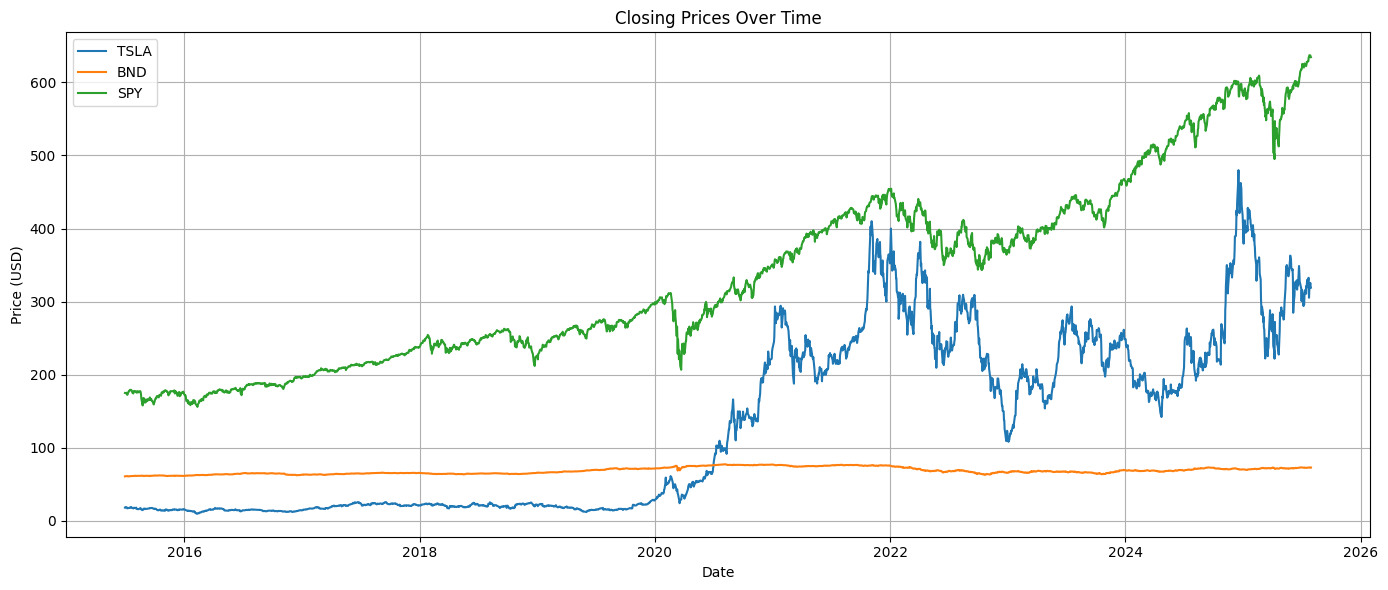

In [86]:
import matplotlib.pyplot as plt

# Plot closing prices
plt.figure(figsize=(14, 6))

plt.plot(merged_df['Close_TSLA'], label='TSLA')
plt.plot(merged_df['Close_BND'], label='BND')
plt.plot(merged_df['Close_SPY'], label='SPY')

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Daily Percentage Change

In [87]:
# Calculate daily % change for closing prices
daily_pct_change = merged_df[['Close_TSLA', 'Close_BND', 'Close_SPY']].pct_change()
daily_pct_change

Price,Close_TSLA,Close_BND,Close_SPY
Date,,,
2015-07-01,NaN,NaN,NaN
2015-07-02,0.040386,0.002472,-0.000916
2015-07-06,-0.001071,0.003453,-0.002846
2015-07-07,-0.042328,0.000983,0.006288
2015-07-08,-0.048231,0.002824,-0.016777
...,...,...,...
2025-07-24,-0.081970,-0.001232,0.000331
2025-07-25,0.035244,0.002468,0.004224
2025-07-28,0.030152,-0.001641,-0.000251


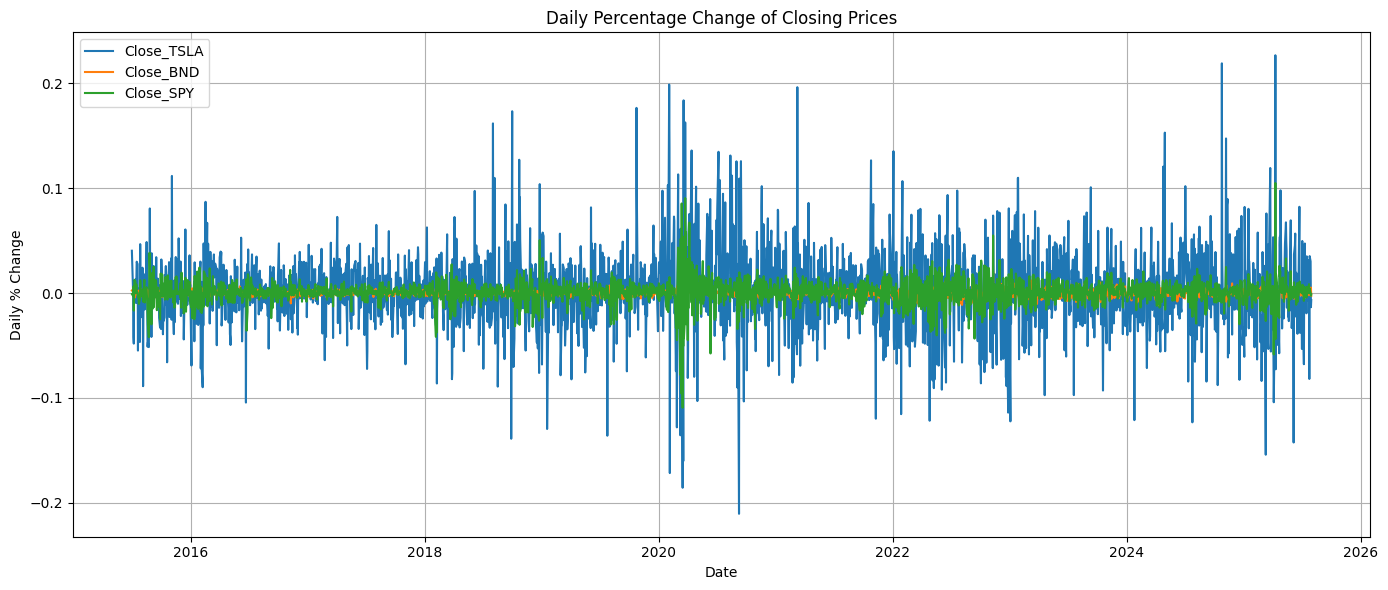

In [89]:
plt.figure(figsize=(14, 6))
for col in daily_pct_change.columns:
    plt.plot( daily_pct_change[col], label=col)

plt.title('Daily Percentage Change of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Calculate Rolling Mean and Standard Deviation

In [90]:
# Set rolling window size
window_size = 20

# Calculate rolling mean and std dev for each asset
rolling_mean = merged_df[['Close_TSLA', 'Close_BND', 'Close_SPY']].rolling(window=window_size).mean()
rolling_std = merged_df[['Close_TSLA', 'Close_BND', 'Close_SPY']].rolling(window=window_size).std()

In [91]:
rolling_mean

Price,Close_TSLA,Close_BND,Close_SPY
Date,,,
2015-07-01,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN
2015-07-06,NaN,NaN,NaN
2015-07-07,NaN,NaN,NaN
2015-07-08,NaN,NaN,NaN
...,...,...,...
2025-07-24,315.332999,72.755984,623.782001
2025-07-25,314.846999,72.748240,625.043500
2025-07-28,314.944998,72.742962,626.145001


In [92]:
rolling_std

Price,Close_TSLA,Close_BND,Close_SPY
Date,,,
2015-07-01,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN
2015-07-06,NaN,NaN,NaN
2015-07-07,NaN,NaN,NaN
2015-07-08,NaN,NaN,NaN
...,...,...,...
2025-07-24,11.944117,0.229255,5.811656
2025-07-25,11.691746,0.221898,5.828138
2025-07-28,11.777141,0.220243,5.893569


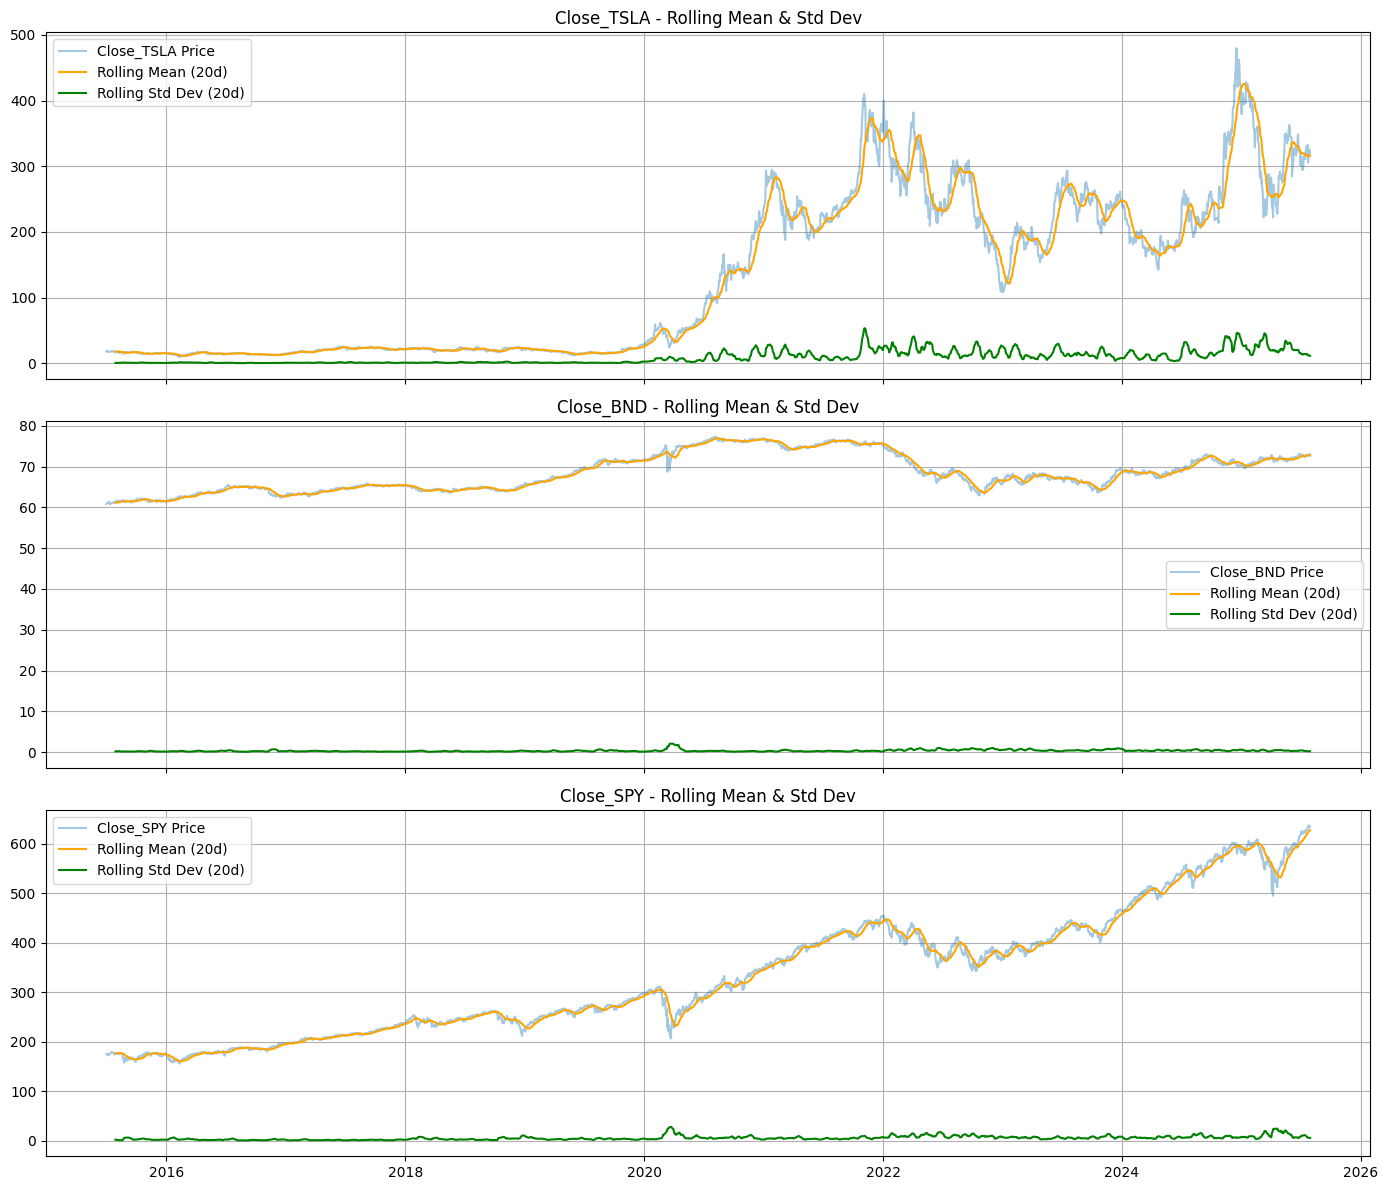

In [94]:
assets = ['Close_TSLA', 'Close_BND', 'Close_SPY']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)

for i, asset in enumerate(assets):
    axes[i].plot( merged_df[asset], label=f'{asset} Price', alpha=0.4)
    axes[i].plot( rolling_mean[asset], label='Rolling Mean (20d)', color='orange')
    axes[i].plot( rolling_std[asset], label='Rolling Std Dev (20d)', color='green')
    axes[i].set_title(f'{asset} - Rolling Mean & Std Dev')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


detect outliers and analyze days with unusually high or low returns

In [95]:
merged_df

Price,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,Close_BND,High_BND,Low_BND,Open_BND,Volume_BND,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY
Date,,,,,,,,,,,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000,60.816734,60.914460,60.764112,60.794183,5399300,174.917114,175.363889,174.124717,175.110995,135979900
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,60.967060,61.027202,60.936989,60.936989,1060100,174.756927,175.566188,174.335441,175.397596,104373700
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,61.177582,61.222691,61.057304,61.222691,2210700,174.259644,175.043603,173.256502,173.458821,117975400
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,61.237698,61.470739,61.237698,61.410603,4183200,175.355469,175.481910,172.059437,174.461918,173820200
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,61.410660,61.463282,61.312928,61.373070,1967800,172.413467,174.293296,172.177436,174.006688,164020100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-24,305.299988,310.149994,300.410004,310.000000,156966000,72.698860,72.798528,72.579254,72.599185,6139200,634.419983,636.150024,633.989990,634.599976,71307100
2025-07-25,316.059998,323.630005,308.010010,308.739990,148227000,72.878265,72.878265,72.688891,72.708822,4845900,637.099976,637.580017,634.840027,635.090027,56865400
2025-07-28,325.589996,330.489990,315.690002,318.450012,112673800,72.758659,72.808497,72.718791,72.778590,5806600,636.940002,638.039978,635.539978,637.479980,54917100


In [96]:
daily_returns = merged_df.pct_change()
daily_returns

Price,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,Close_BND,High_BND,Low_BND,Open_BND,Volume_BND,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY
Date,,,,,,,,,,,,,,,
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,0.040386,0.036057,0.020385,0.033529,2.409433,0.002472,0.001851,0.002845,0.002349,-0.803660,-0.000916,0.001154,0.001210,0.001637,-0.232433
2015-07-06,-0.001071,-0.002691,0.010940,-0.004711,-0.424629,0.003453,0.003203,0.001974,0.004688,1.085369,-0.002846,-0.002977,-0.006189,-0.011054,0.130317
2015-07-07,-0.042328,-0.023040,-0.056207,-0.013913,0.481137,0.000983,0.004052,0.002954,0.003069,0.892251,0.006288,0.002504,-0.006909,0.005783,0.473360
2015-07-08,-0.048231,-0.052326,-0.024773,-0.057018,0.019001,0.002824,-0.000121,0.001229,-0.000611,-0.529595,-0.016777,-0.006773,0.000686,-0.002609,-0.056381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-24,-0.081970,-0.077484,-0.085983,-0.063161,0.695943,-0.001232,-0.001094,-0.002466,-0.003284,0.165066,0.000331,0.003059,0.006765,0.004829,0.011290
2025-07-25,0.035244,0.043463,0.025299,-0.004065,-0.055674,0.002468,0.001095,0.001511,0.001510,-0.210663,0.004224,0.002248,0.001341,0.000772,-0.202528
2025-07-28,0.030152,0.021197,0.024934,0.031450,-0.239856,-0.001641,-0.000957,0.000411,0.000960,0.198250,-0.000251,0.000721,0.001103,0.003763,-0.034262


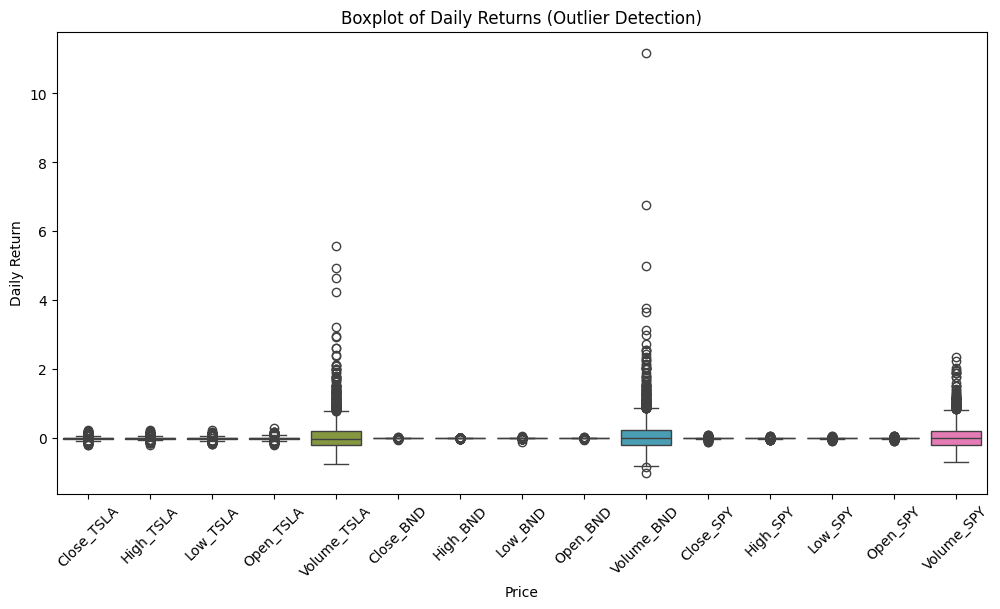

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_returns)
plt.title("Boxplot of Daily Returns (Outlier Detection)")
plt.ylabel("Daily Return")
plt.xticks(rotation=45)
plt.show()


In [99]:
outliers = (daily_returns - daily_returns.mean()) > 3 * daily_returns.std()
outlier_days = daily_returns[outliers.any(axis=1)]
print("Outlier Days (±3 std):")
outlier_days


Outlier Days (±3 std):


e:\project\Week 11\Time-Series-Forecasting\forcast_venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Price,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,Close_BND,High_BND,Low_BND,Open_BND,Volume_BND,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY
Date,,,,,,,,,,,,,,,
2015-07-02,0.040386,0.036057,0.020385,0.033529,2.409433,0.002472,0.001851,0.002845,0.002349,-0.803660,-0.000916,0.001154,0.001210,0.001637,-0.232433
2015-07-17,0.029923,0.031213,0.019342,0.031338,2.096597,0.000124,0.000493,0.001851,0.002221,-0.240053,0.000848,0.001178,0.001040,0.001982,-0.165474
2015-08-05,0.014458,0.016047,0.007974,0.013730,1.641573,-0.001594,-0.003791,-0.002698,-0.003792,1.081803,0.003295,0.005041,0.004454,0.003576,0.048472
2015-08-19,-0.020980,-0.001150,0.005758,0.019383,-0.140810,0.003556,0.002572,-0.001227,-0.001593,0.251591,-0.007906,-0.003180,-0.011207,-0.005565,1.412324
2015-08-25,0.005300,-0.002161,0.123692,0.136742,-0.548374,-0.003292,-0.006187,-0.004028,-0.004617,0.120733,-0.011768,-0.010280,0.024780,0.042349,-0.270897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-14,0.000159,0.015752,0.018934,0.025889,-0.223446,0.005693,0.005267,0.011063,0.007393,-0.254958,0.009701,0.014634,0.026516,0.040229,-0.304827
2025-04-23,0.053662,0.068619,0.063433,0.103481,0.244281,0.002072,0.008272,0.001796,0.004552,-0.023150,0.015495,0.030474,0.028294,0.039009,0.192797
2025-04-25,0.098031,0.105225,0.041854,0.044671,0.773801,0.003290,0.003290,0.003574,0.003983,0.072051,0.007225,0.006613,0.015389,0.018501,-0.047245


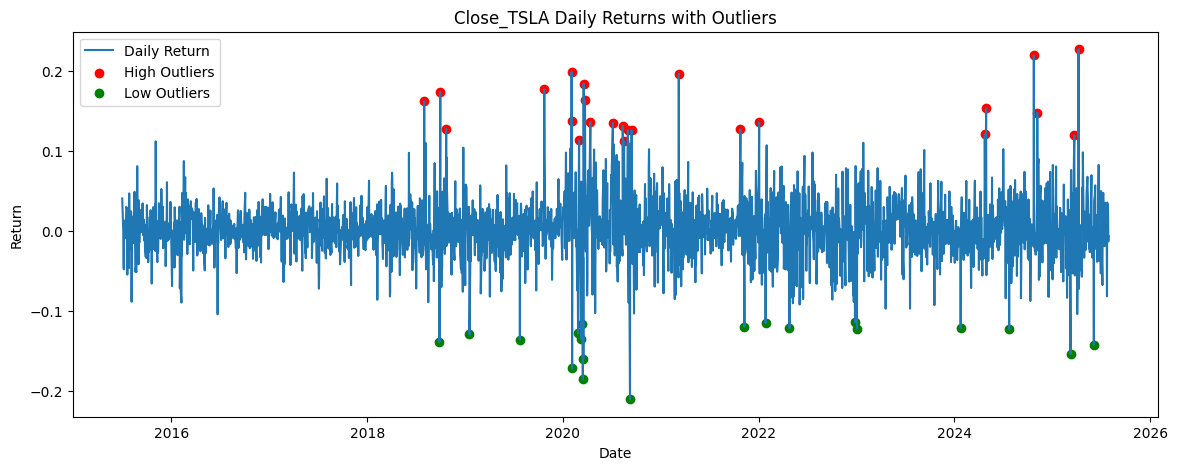

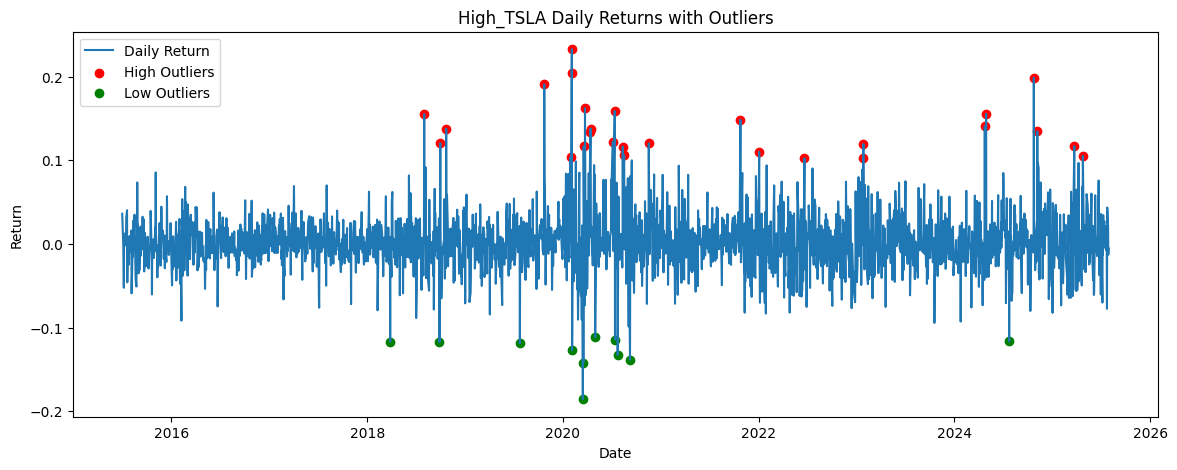

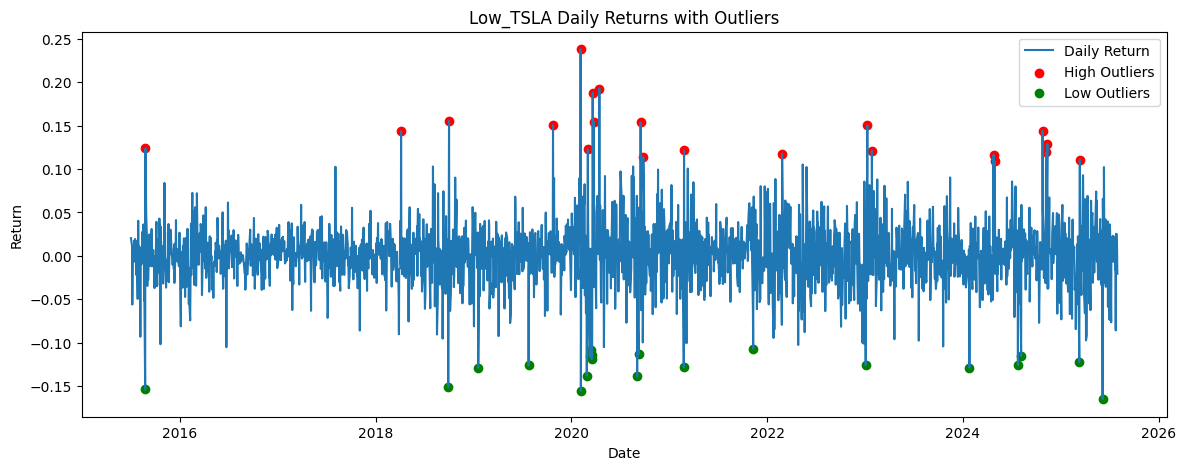

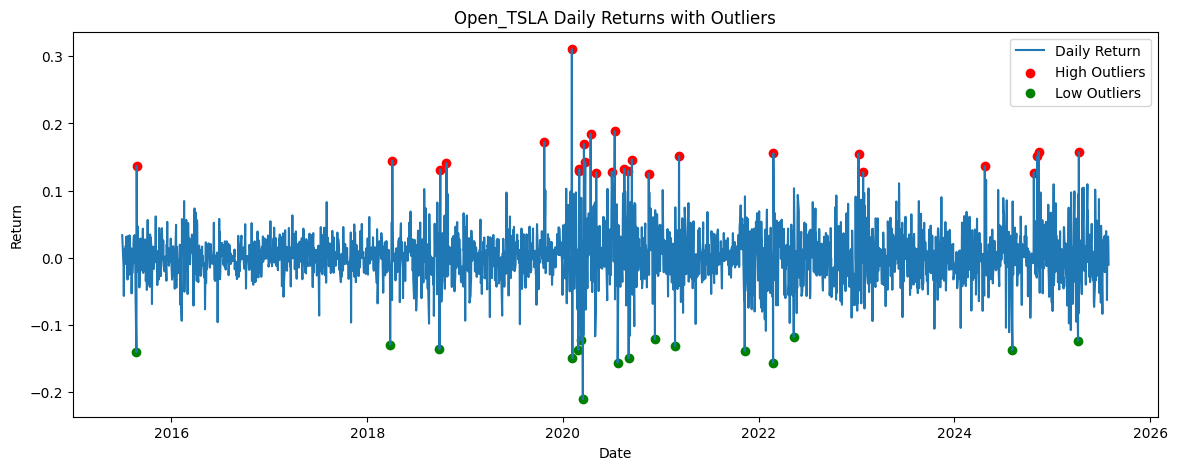

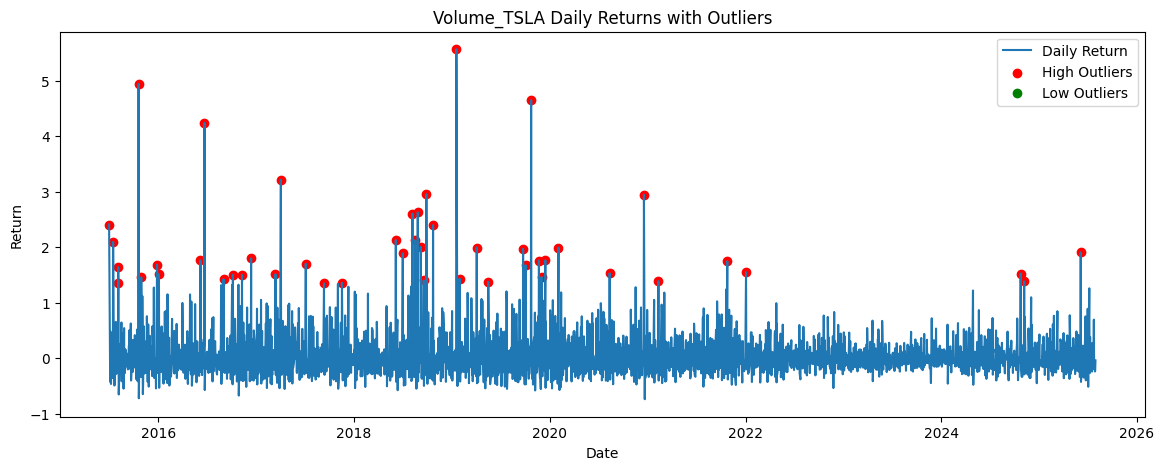

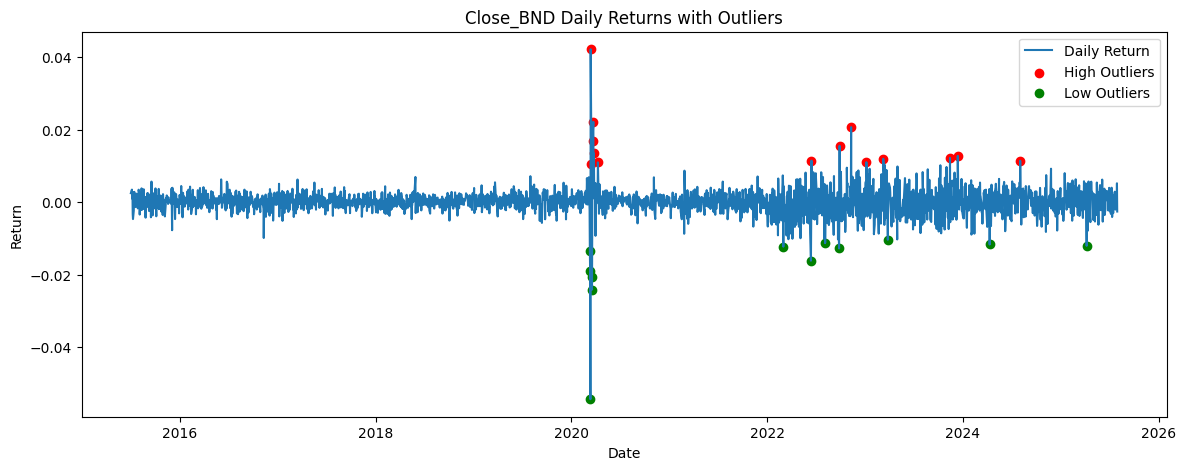

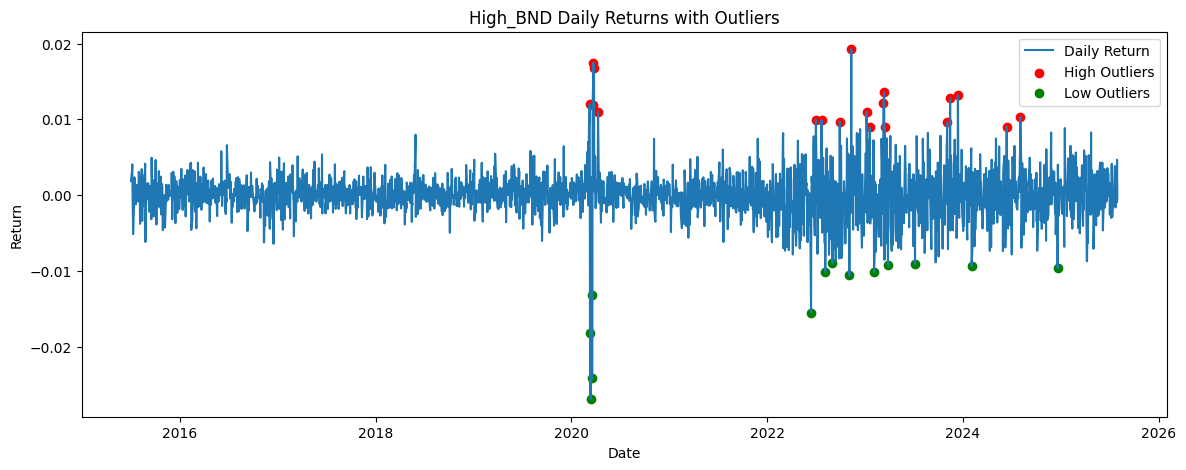

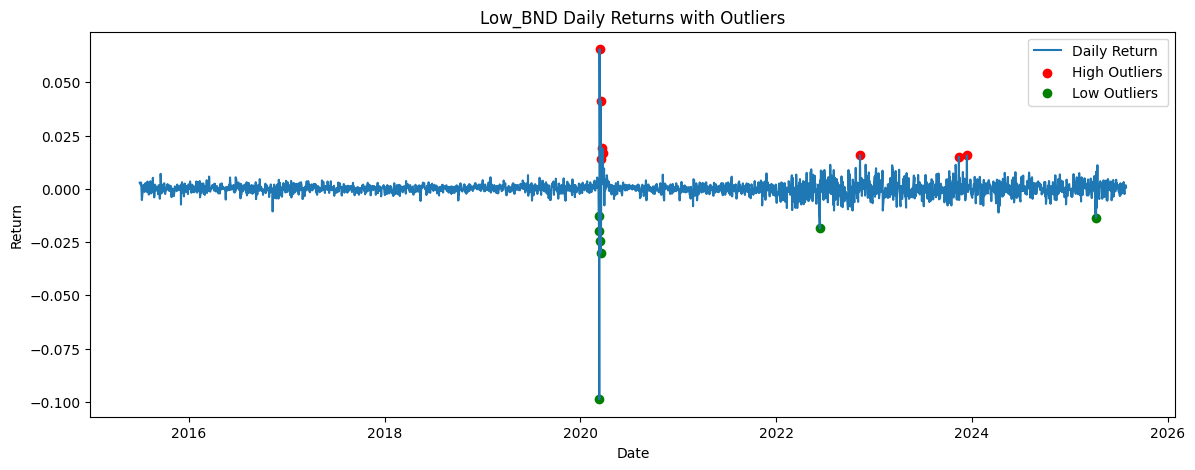

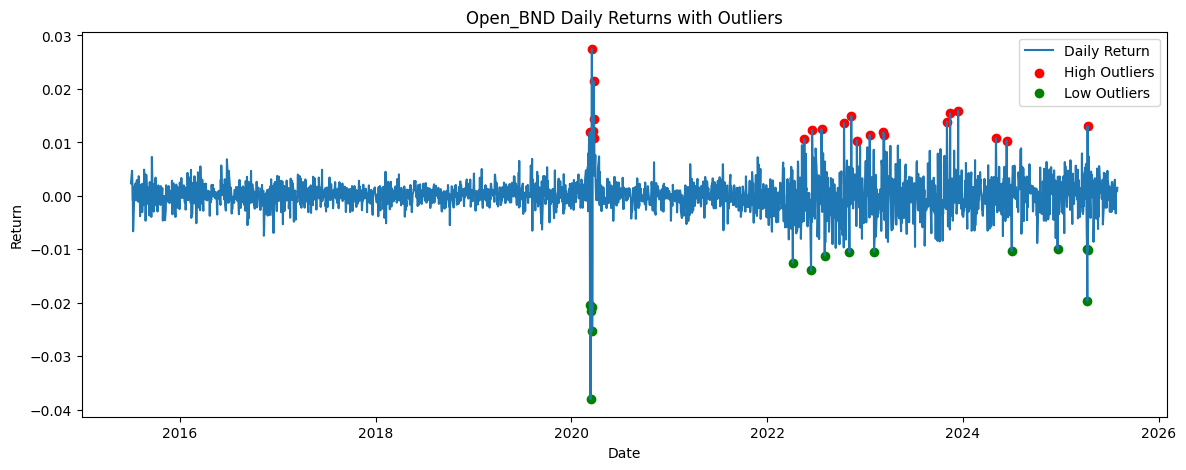

e:\project\Week 11\Time-Series-Forecasting\forcast_venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


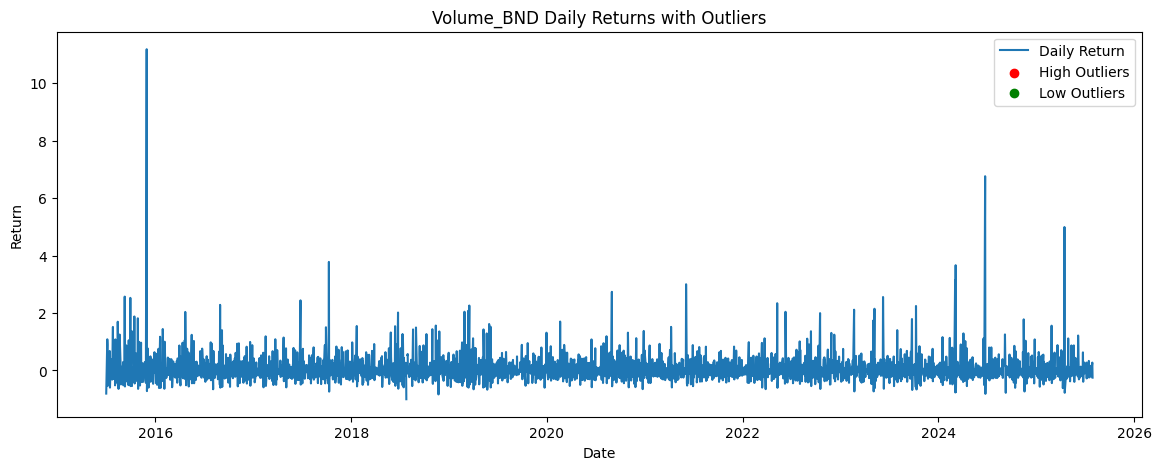

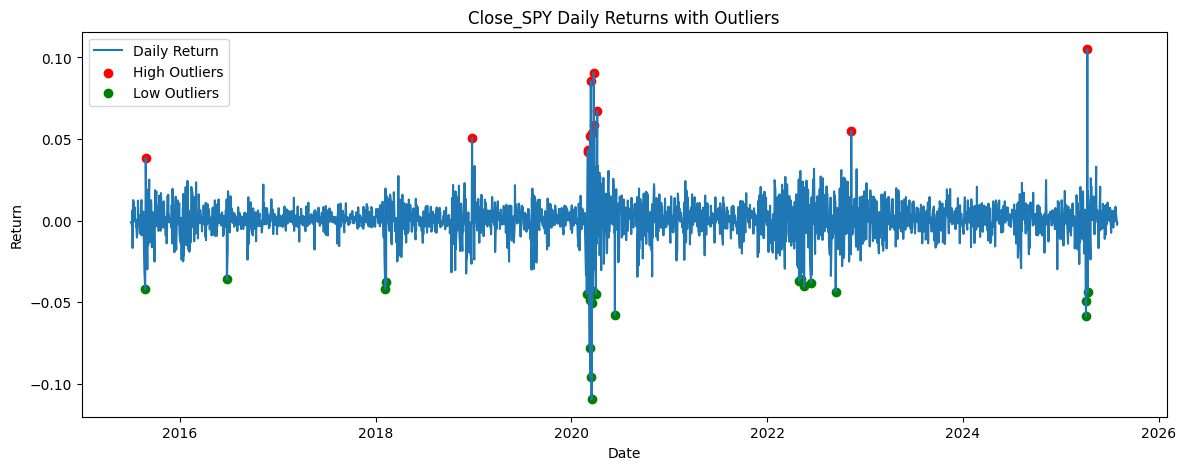

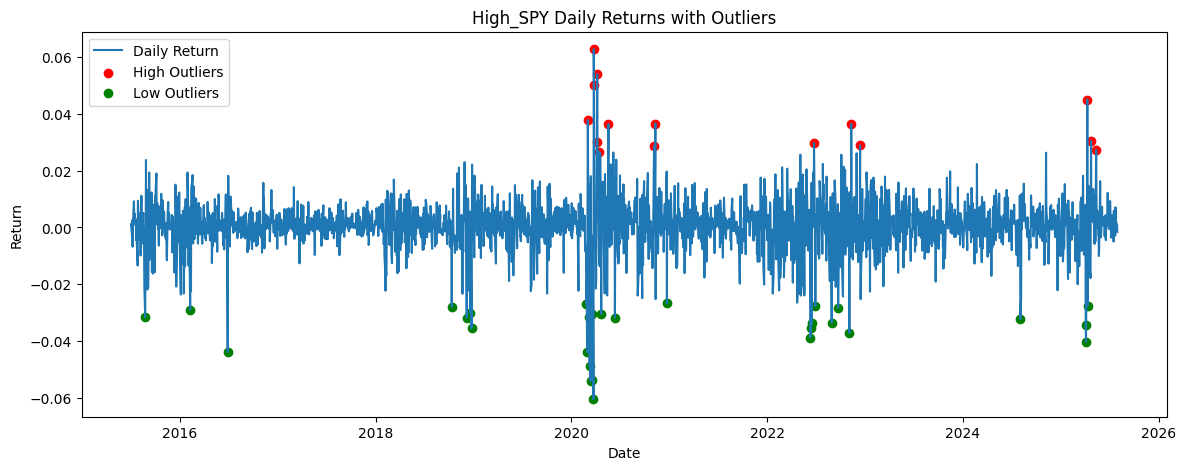

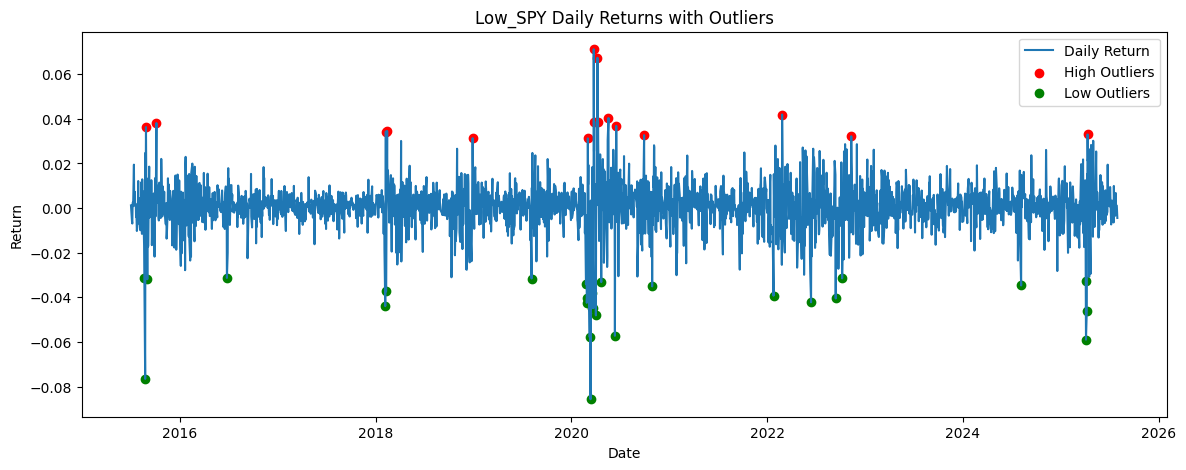

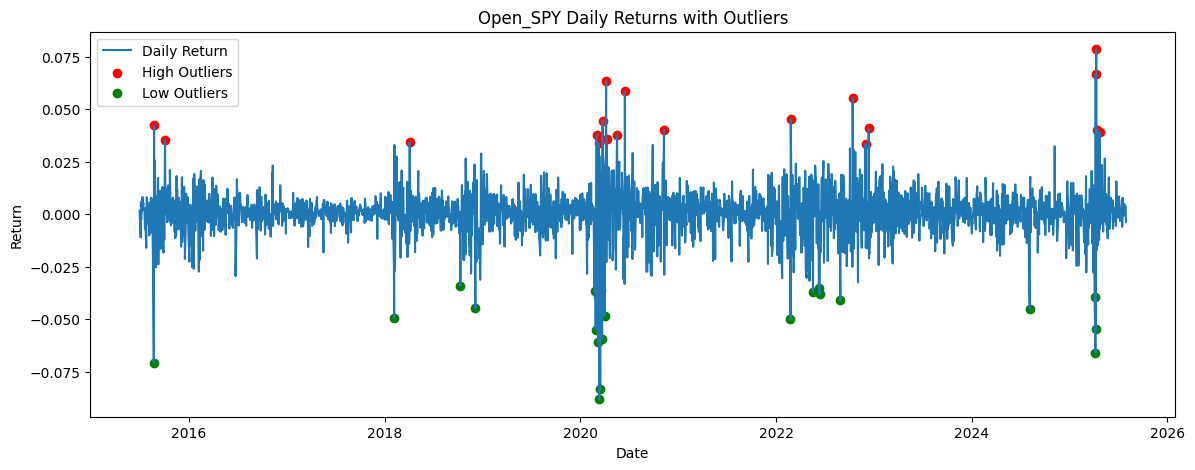

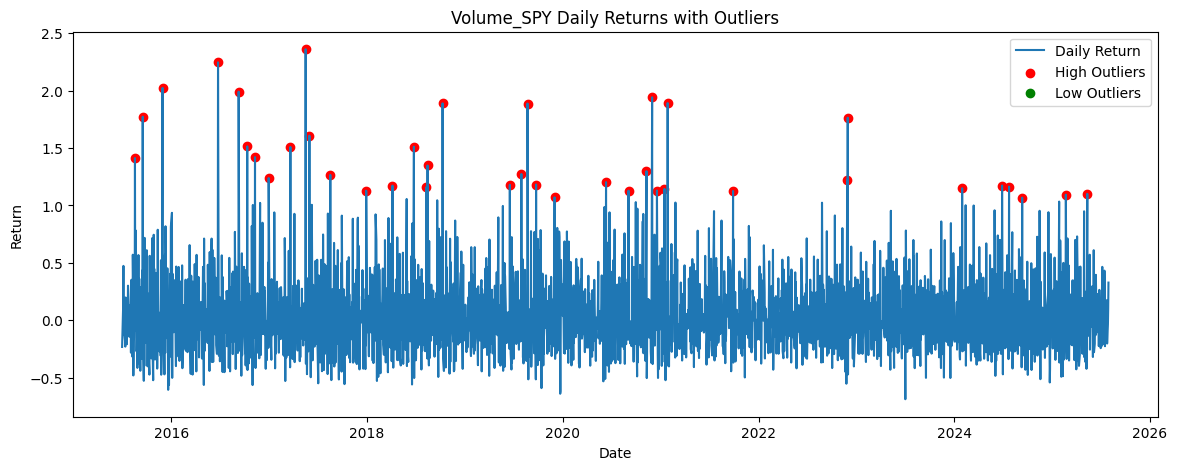

In [100]:
for col in daily_returns.columns:
    plt.figure(figsize=(14, 5))
    plt.plot(daily_returns[col], label='Daily Return')
    high = daily_returns[col] > 3 * daily_returns[col].std()
    low = daily_returns[col] < -3 * daily_returns[col].std()
    plt.scatter(daily_returns.index[high], daily_returns[col][high], color='red', label='High Outliers')
    plt.scatter(daily_returns.index[low], daily_returns[col][low], color='green', label='Low Outliers')
    plt.title(f'{col} Daily Returns with Outliers')
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.legend()
    plt.show()


In [104]:
outlier_counts = outliers.sum()
print("Outlier Count per Column:\n", outlier_counts)


Outlier Count per Column:
 Price
Close_TSLA     22
High_TSLA      27
Low_TSLA       21
Open_TSLA      27
Volume_TSLA    40
Close_BND      14
High_BND       18
Low_BND         8
Open_BND       21
Volume_BND      0
Close_SPY      12
High_SPY       14
Low_SPY        14
Open_SPY       18
Volume_SPY     35
dtype: int64


In [106]:
top_outliers = outlier_days.copy()
top_outliers['MaxAbsReturn'] = outlier_days.abs().max(axis=1)
top_outliers = top_outliers.sort_values('MaxAbsReturn', ascending=False)

# View top 10 extreme days
top_outliers.head(10)


Price,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,Close_BND,High_BND,Low_BND,Open_BND,Volume_BND,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY,MaxAbsReturn
Date,,,,,,,,,,,,,,,,
2015-11-30,-0.005829,0.008741,0.009119,0.003159,0.364420,-0.000491,-0.000123,-6.146701e-04,-0.000491,11.180620,-0.004151,0.000429,-0.001436,0.001528,2.023295,11.180620
2019-01-18,-0.129711,-0.069331,-0.129072,-0.067040,5.568608,-0.000757,-0.000252,-5.051991e-04,-0.001135,0.554433,0.013310,0.011594,0.011694,0.019115,0.330654,5.568608
2015-10-20,-0.066068,-0.011032,-0.101983,0.005386,4.941226,-0.001584,-0.001705,-9.756308e-04,-0.001705,0.604809,-0.001278,0.002311,0.002078,0.001728,0.025150,4.941226
2019-10-24,0.176692,0.190482,0.150587,0.172377,4.649180,0.000119,0.000237,-9.405141e-08,-0.000475,-0.446240,0.001634,0.003768,0.003216,0.007298,0.032047,4.649180
2016-06-22,-0.104503,-0.074673,-0.105388,-0.096112,4.242305,0.000360,-0.000958,-1.200004e-04,-0.001198,-0.250630,-0.001631,0.002776,0.000722,0.001680,0.318773,4.242305
2017-04-03,0.072655,0.069079,0.029893,0.029311,3.215565,0.003634,0.003387,9.138074e-04,0.001656,-0.107027,-0.001739,-0.002029,-0.007510,-0.000424,0.160218,3.215565
2018-09-28,-0.139015,-0.117348,-0.151021,-0.136274,2.954555,0.000000,0.001144,5.087880e-04,0.001271,0.875100,0.000103,-0.002158,-0.000517,-0.001446,0.182987,2.954555
2020-12-18,0.059613,0.054916,0.014592,0.064805,2.947500,-0.000340,-0.000679,2.272984e-04,-0.000453,-0.300367,-0.003993,0.000730,-0.006645,0.001643,1.129497,2.947500
2020-08-31,0.125689,0.078590,0.006417,-0.031401,0.178957,0.002948,0.002831,1.588624e-03,0.000680,2.737340,-0.003623,0.001653,0.002614,0.002604,0.360377,2.737340


| Date       | TSLA Move | Key Driver/Event                           |
| ---------- | --------- | ------------------------------------------ |
| 2015‑10‑20 | –6.6%     | Reliability concern by Consumer Reports    |
| 2015‑11‑30 | –5.8%     | Year-end sentiment caution around earnings |
| 2016‑06‑22 | –9.8%     | SolarCity acquisition announcement         |
| 2017‑04‑03 | +7.3%     | Record deliveries, Model 3 ramp-up         |
| 2018‑09‑28 | –13.9%    | SEC suit against Elon Musk                 |
| 2019‑01‑18 | –12.9%    | Layoffs and weak guidance                  |
| 2019‑10‑24 | +17–20%   | Strong Q3 earnings report                  |
| 2020‑08‑31 | +12.6%    | S\&P 500 inclusion speculation             |
| 2020‑12‑18 | +6.0%     | Official S\&P 500 inclusion date           |


Analyze Seasonality and Trends

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [108]:
# Helper Function to Run ADF Test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)

    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value

    print(out)
    if result[1] <= 0.05:
        print("=> The series is **stationary** (reject H0)")
    else:
        print("=> The series is **non-stationary** (fail to reject H0)")
    print()


In [109]:
adf_test(merged_df['Close_TSLA'], title='TSLA Closing Price')
adf_test(merged_df['Close_BND'], title='BND Closing Price')
adf_test(merged_df['Close_SPY'], title='SPY Closing Price')


Augmented Dickey-Fuller Test: TSLA Closing Price
ADF Statistic             -1.418872
p-value                    0.573196
# Lags Used               27.000000
# Observations          2507.000000
Critical Value (1%)       -3.432961
Critical Value (5%)       -2.862694
Critical Value (10%)      -2.567384
dtype: float64
=> The series is **non-stationary** (fail to reject H0)

Augmented Dickey-Fuller Test: BND Closing Price
ADF Statistic             -1.536250
p-value                    0.515509
# Lags Used               13.000000
# Observations          2521.000000
Critical Value (1%)       -3.432947
Critical Value (5%)       -2.862687
Critical Value (10%)      -2.567381
dtype: float64
=> The series is **non-stationary** (fail to reject H0)

Augmented Dickey-Fuller Test: SPY Closing Price
ADF Statistic              0.690812
p-value                    0.989653
# Lags Used                9.000000
# Observations          2525.000000
Critical Value (1%)       -3.432942
Critical Value (5%)       -